# Basic Probability Calculations

In [396]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Function that gives 2D distribution

In [397]:
def custom_2d_distribution(x, y):
    X, Y = np.meshgrid(x, y)
    Z = np.sin(10*X) * np.cos(10*Y) + 0.5 * np.sin(10*X) * np.sin(10*Y)
    #'''
    # Apply Hann window
    hann_x = np.hanning(len(x))
    hann_y = np.hanning(len(y))
    window = np.outer(0.01*hann_x, 0.01*hann_y)
    
    # Apply the window to the distribution
    Z *= window
    #'''
    # Ensure the distribution is always positive
    Z[Z < 0] = 0
    
    return X, Y, Z

## Prior box

In [398]:
def define_prior_box(x, y, box_x, box_y):
    X, Y = np.meshgrid(x, y)
    prior_box = (X >= box_x[0]) & (X <= box_x[1]) & (Y >= box_y[0]) & (Y <= box_y[1])
    return prior_box

## Sampling of the reference probability on a 2D regular grid in the prior box

In [399]:
def sample_distribution_within_prior_box(Z, prior_box):
    Z_prior_box = Z[prior_box]
    return Z_prior_box

# Define the range for x and y
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Define the prior box coordinates
box_x = (-0.5, 0.5)
box_y = (-0.5, 0.5)

## Plot

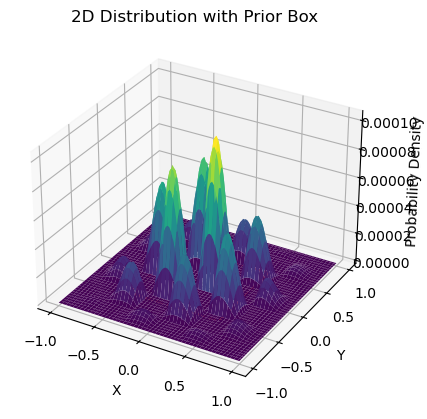

Sampled values within the prior box:
[1.80785982e-05 1.97472671e-05 2.06233192e-05 ... 7.18397116e-06
 6.87880531e-06 6.29753760e-06]
Sampled values within the prior box after normalization:
[0.0004773  0.00052136 0.00054449 ... 0.00018967 0.00018161 0.00016626]


'\n# Print the sum of the normalized values within the prior box\nprint("Sum of normalized values within the prior box:", np.sum(Z_prior_box_normalized))\n'

In [400]:
# Calculate the 2D distribution
X, Y, Z = custom_2d_distribution(x, y)

# Define the prior box
prior_box = define_prior_box(x, y, box_x, box_y)

# Sample the distribution within the prior box
Z_prior_box = sample_distribution_within_prior_box(Z, prior_box)

# Normalize the PDF within the prior box
Z_prior_box_normalized = Z_prior_box / np.sum(Z_prior_box)

# Plot the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot the prior box
ax.plot([box_x[0], box_x[0], box_x[1], box_x[1], box_x[0]], 
        [box_y[0], box_y[1], box_y[1], box_y[0], box_y[0]], 
        zs=0, color='r', linestyle='--', alpha=0.5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('2D Distribution with Prior Box')

plt.show()

# Print sampled values within the prior box
print("Sampled values within the prior box:")
print(Z_prior_box)

# Print sampled values within the prior box after normalization
print("Sampled values within the prior box after normalization:")
print(Z_prior_box_normalized)

'''
# Print the sum of the normalized values within the prior box
print("Sum of normalized values within the prior box:", np.sum(Z_prior_box_normalized))
'''

## Contour plot the distribution

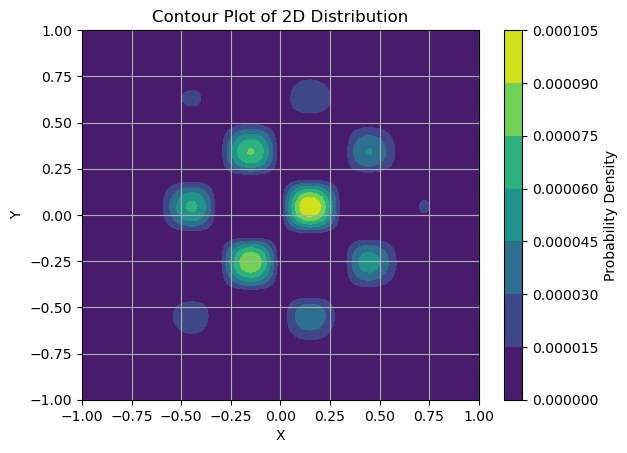

In [401]:
# Calculate the 2D distribution
X, Y, Z = custom_2d_distribution(x, y)

# Create a contour plot
plt.contourf(X, Y, Z, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of 2D Distribution')
plt.colorbar(label='Probability Density')
plt.grid(True)
plt.show()

## Marginalization of the distribution
**-> two 1D distributions**

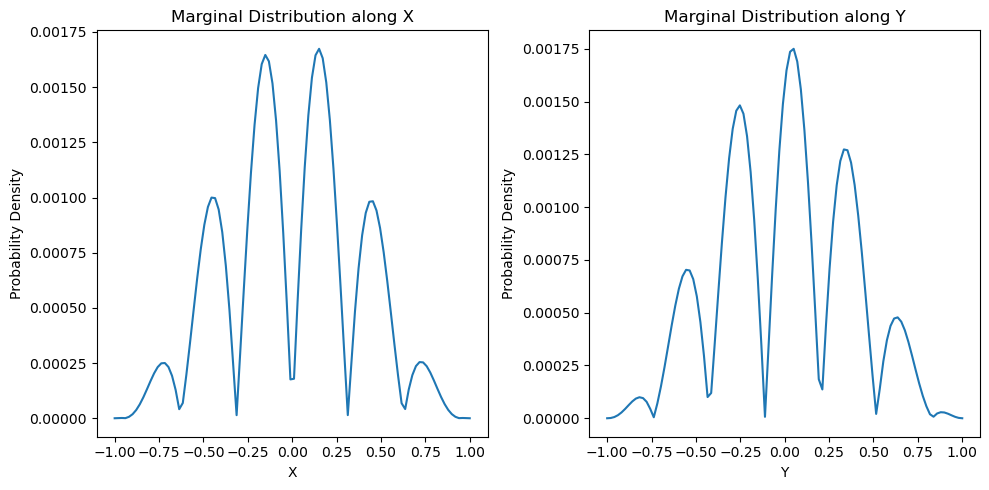

In [402]:
# Marginalize the distribution to obtain 1D distributions
Z_marginal_x = np.sum(Z, axis=0)
Z_marginal_y = np.sum(Z, axis=1)

# Plot the marginalized distributions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, Z_marginal_x)
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Marginal Distribution along X')

plt.subplot(1, 2, 2)
plt.plot(y, Z_marginal_y)
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.title('Marginal Distribution along Y')

plt.tight_layout()
plt.show()


**Checking that marginalization does not alter the normalization of the pdf**

In [403]:
# Marginalize the distribution to obtain 1D distributions
Z_marginal_x = np.sum(Z, axis=0)
Z_marginal_y = np.sum(Z, axis=1)

# Check normalization of the marginalized distributions
sum_marginal_x = np.sum(Z_marginal_x)
sum_marginal_y = np.sum(Z_marginal_y)

# Print the sum of values in the marginalized distributions
print("Sum of values in the marginalized distribution along X:", sum_marginal_x)
print("Sum of values in the marginalized distribution along Y:", sum_marginal_y)

Sum of values in the marginalized distribution along X: 0.0554887272849117
Sum of values in the marginalized distribution along Y: 0.0554887272849117


## Cumulative distribution function of the 1D distribution

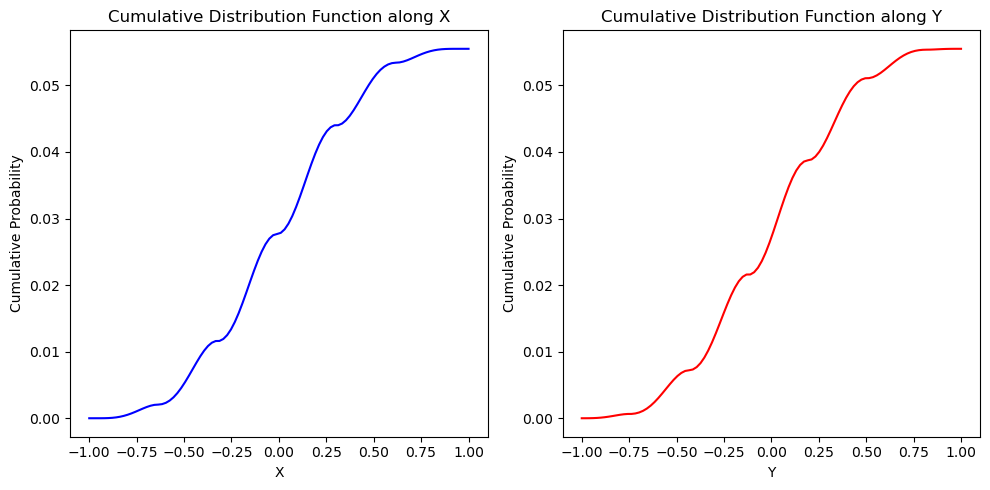

In [404]:
# Calculate the cumulative distribution function (CDF)
CDF_x = np.cumsum(Z_marginal_x)
CDF_y = np.cumsum(Z_marginal_y)

# Plot the cumulative distribution function (CDF)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, CDF_x, color='blue')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function along X')

plt.subplot(1, 2, 2)
plt.plot(y, CDF_y, color='red')
plt.xlabel('Y')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function along Y')

plt.tight_layout()
plt.show()

## Mean, median and mode

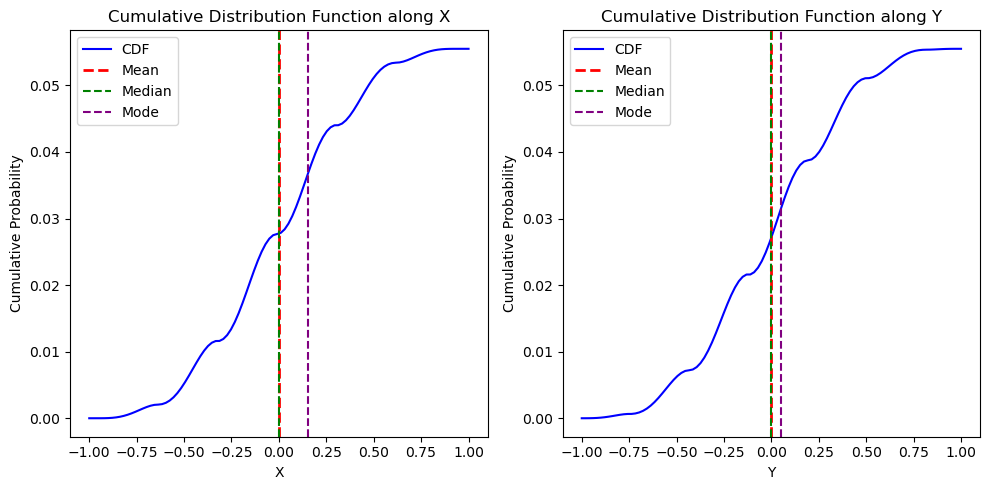

Statistics for X-axis:
Mean: 8.215650382226158e-17
Median: 5.551115123125783e-17
Mode: 0.1515151515151516

Statistics for Y-axis:
Mean: 8.215650382226158e-17
Median: 5.551115123125783e-17
Mode: 0.05050505050505061


In [405]:
# Calculate mean, median, and mode
mean_x = np.mean(x)
median_x = np.median(x)
mode_x = x[np.argmax(Z_marginal_x)]

mean_y = np.mean(y)
median_y = np.median(y)
mode_y = y[np.argmax(Z_marginal_y)]

# Plot the cumulative distribution function (CDF) with mean, median, and mode
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, CDF_x, color='blue', label='CDF')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean', linewidth=2)
plt.axvline(median_x, color='green', linestyle='--', label='Median')
plt.axvline(mode_x, color='purple', linestyle='--', label='Mode')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function along X')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y, CDF_y, color='blue', label='CDF')
plt.axvline(mean_y, color='red', linestyle='--', label='Mean', linewidth=2)
plt.axvline(median_y, color='green', linestyle='--', label='Median')
plt.axvline(mode_y, color='purple', linestyle='--', label='Mode')
plt.xlabel('Y')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function along Y')
plt.legend()

plt.tight_layout()
plt.show()

# Print calculated statistics
print("Statistics for X-axis:")
print("Mean:", mean_x)
print("Median:", median_x)
print("Mode:", mode_x)

print("\nStatistics for Y-axis:")
print("Mean:", mean_y)
print("Median:", median_y)
print("Mode:", mode_y)